<a href="https://colab.research.google.com/github/koushik2299/Item-Store-Sale-Prediction-/blob/main/EDA%2BModelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [ ]:
df=pd.read_csv("/content/Train.csv")

# EDA

Exploratory Data Analysis (EDA) is a crucial step in the data analysis process. It involves summarizing and visualizing the main characteristics of a dataset to better understand the data and identify patterns, trends, and outliers. 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
df.groupby('Item_Type').agg({'Item_Weight':'mean'})

,Item_Weight
Item_Type,
Baking Goods,12.277108
Breads,11.346936
Breakfast,12.768202
Canned,12.305705
Dairy,13.426069
Frozen Foods,12.867061
Fruits and Vegetables,13.224769
Hard Drinks,11.400328
Health and Hygiene,13.142314


In [ ]:
df.Item_Weight.mean()

12.857645184135976

In [ ]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


## Missing Values

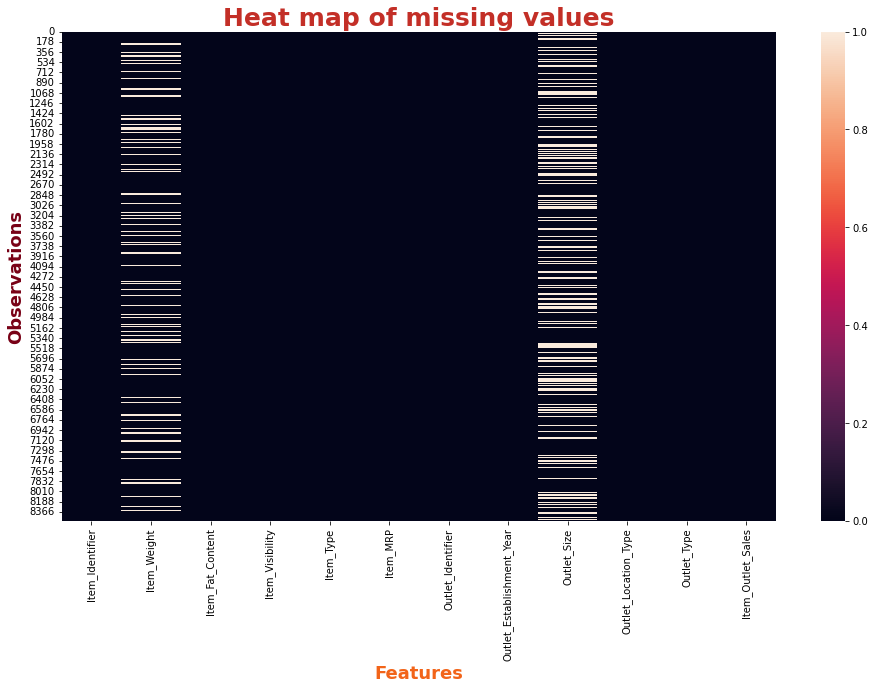

In [ ]:
plt.figure(figsize=(16,9))
sns.heatmap(df.isna())

plt.xlabel("Features",size=18,color="#f26419",fontweight="bold")
plt.ylabel("Observations",size=18,color="#780116",fontweight="bold")
plt.title("Heat map of missing values",size=25,fontweight="bold",color="#c32f27")
plt.show()

In [ ]:
missing_value_percentage=pd.DataFrame(df.isna().sum()*100/8523)

In [ ]:
missing_value_percentage.reset_index(level=0,inplace=True)

In [ ]:
missing_value_percentage.columns=["Features","Percentage_of_NA"]
missing_value_percentage

,Features,Percentage_of_NA
0,Item_Identifier,0.000000
1,Item_Weight,17.165317
2,Item_Fat_Content,0.000000
3,Item_Visibility,0.000000
4,Item_Type,0.000000
5,Item_MRP,0.000000
6,Outlet_Identifier,0.000000
7,Outlet_Establishment_Year,0.000000
8,Outlet_Size,28.276428
9,Outlet_Location_Type,0.000000


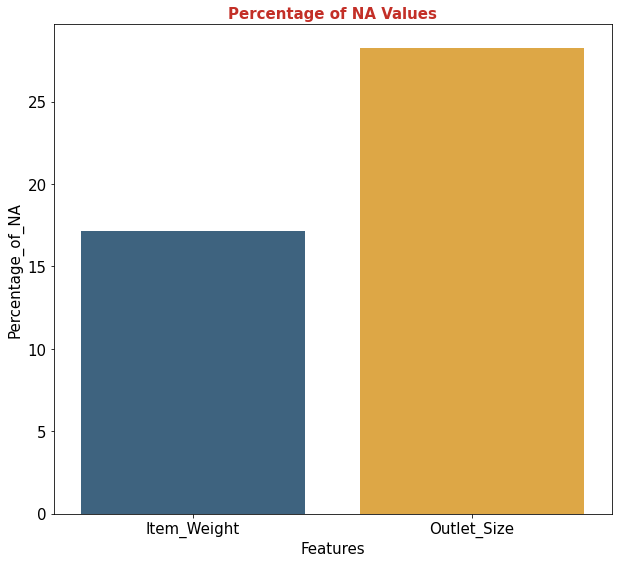

In [ ]:
plt.figure(figsize=(10,9))
sns.barplot(x="Features",y="Percentage_of_NA",data=missing_value_percentage[missing_value_percentage["Percentage_of_NA"]>0],palette=['#33658a','#f6ae2d'])
plt.xlabel("Features",size=15)
plt.ylabel("Percentage_of_NA",size=15)
plt.title("Percentage of NA Values",size=15,fontweight="bold",color="#c32f27")
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

In [ ]:
df1=df

Assuming Outlet type and Outlet Size are correlated based on domain knowledge. 
Lets see the corealtion by uing contigency matrix 

In [ ]:
# Create a contingency table of Outlet Type and Outlet Size
contingency_table = pd.crosstab(df['Outlet_Type'], df['Outlet_Size'], margins=True)

# Print the contingency table
print(contingency_table)

Outlet_Size        High  Medium  Small   All
Outlet_Type                                 
Grocery Store         0       0    528   528
Supermarket Type1   932     930   1860  3722
Supermarket Type2     0     928      0   928
Supermarket Type3     0     935      0   935
All                 932    2793   2388  6113


In [ ]:
# Calculate the percentage of each Outlet Type that falls into each Outlet Size category
outlet_type_size_pct = contingency_table.div(contingency_table['All'], axis=0).iloc[:-1, :-1]

# Print the percentage table
print(outlet_type_size_pct)

Outlet_Size            High    Medium     Small
Outlet_Type                                    
Grocery Store      0.000000  0.000000  1.000000
Supermarket Type1  0.250403  0.249866  0.499731
Supermarket Type2  0.000000  1.000000  0.000000
Supermarket Type3  0.000000  1.000000  0.000000


In [ ]:
# Impute missing Outlet Size values based on the percentage table
for idx, row in df[df['Outlet_Size'].isnull()].iterrows():
    outlet_type = row['Outlet_Type']
    outlet_size = outlet_type_size_pct.loc[outlet_type].idxmax()
    df1.loc[idx, 'Outlet_Size'] = outlet_size

In [ ]:
grouped = df1.groupby("Item_Type")
item_type_mean = grouped["Item_Weight"].mean()

print(item_type_mean)

Item_Type
Baking Goods             12.277108
Breads                   11.346936
Breakfast                12.768202
Canned                   12.305705
Dairy                    13.426069
Frozen Foods             12.867061
Fruits and Vegetables    13.224769
Hard Drinks              11.400328
Health and Hygiene       13.142314
Household                13.384736
Meat                     12.817344
Others                   13.853285
Seafood                  12.552843
Snack Foods              12.987880
Soft Drinks              11.847460
Starchy Foods            13.690731
Name: Item_Weight, dtype: float64


In [ ]:
df1.groupby("Item_Type").agg({'Item_Weight':'mean'})

,Item_Weight
Item_Type,
Baking Goods,12.277108
Breads,11.346936
Breakfast,12.768202
Canned,12.305705
Dairy,13.426069
Frozen Foods,12.867061
Fruits and Vegetables,13.224769
Hard Drinks,11.400328
Health and Hygiene,13.142314


In [ ]:
grouped = df.groupby('Item_Type')['Item_Weight'].mean()

# Loop through each group and impute the missing values with the mean value of the group
for item_type, mean_weight in grouped.iteritems():
    df1.loc[df['Item_Type'] == item_type, 'Item_Weight'] = df1.loc[df['Item_Type'] == item_type, 'Item_Weight'].fillna(mean_weight)


In [ ]:
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

## Visualisations

Corelational Analysis

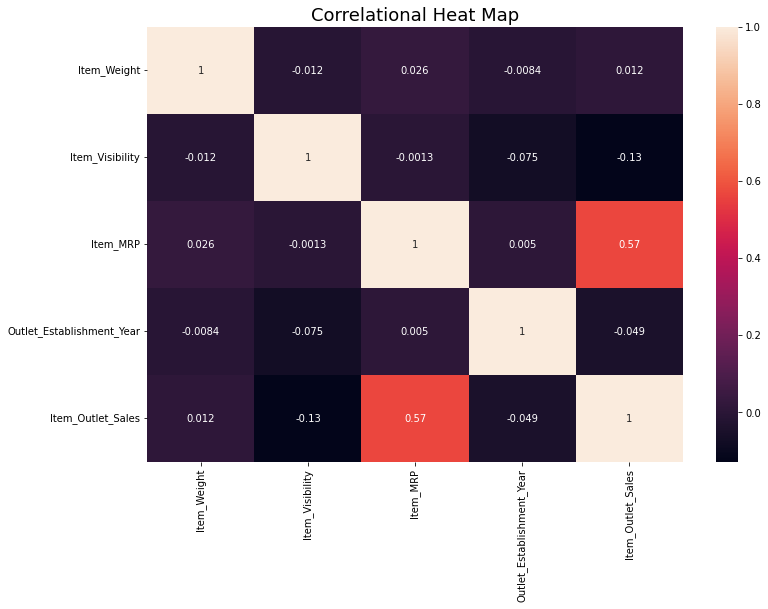

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df1.corr(),annot=True)
plt.title("Correlational Heat Map",size=18)
plt.show()

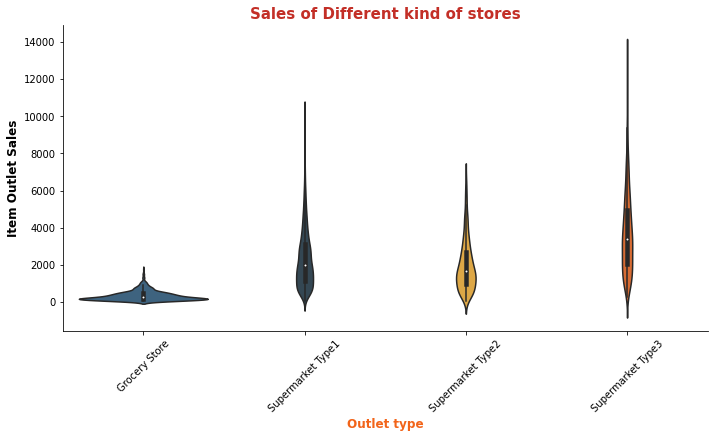

In [ ]:
custom_palette = sns.color_palette(['#33658a', '#2f4858', '#f6ae2d','#f26419'])
sns.catplot(data=df, x="Outlet_Type", y="Item_Outlet_Sales",kind="violin",height=5, aspect=2,order=["Grocery Store","Supermarket Type1","Supermarket Type2","Supermarket Type3"],palette=custom_palette)
plt.title("Sales of Different kind of stores",size=15,fontweight="bold",color="#c32f27")
plt.xlabel("Outlet type",size=12,color="#f26419",fontweight="bold")
plt.ylabel("Item Outlet Sales",size=12,fontweight="bold")
plt.xticks(rotation=45)
plt.show()

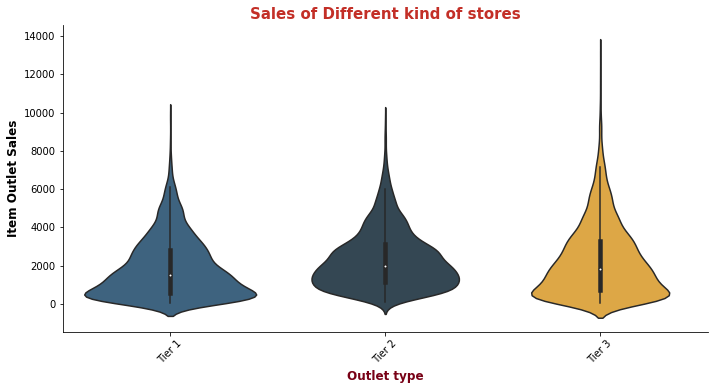

In [ ]:
from pandas._libs.algos import pad_inplace
sns.catplot(data=df, x="Outlet_Location_Type", y="Item_Outlet_Sales",kind="violin",height=5, aspect=2,order=["Tier 1", "Tier 2","Tier 3"],palette=custom_palette)
plt.title("Sales of Different kind of stores",size=15,fontweight="bold",color="#c32f27")
plt.xlabel("Outlet type",size=12,color="#780116",fontweight="bold")
plt.ylabel("Item Outlet Sales",size=12,fontweight="bold")
plt.xticks(rotation=45)
plt.show()

Store which are present in **Tier 3** have more sales than Tier 1 and Tier 2

**Distributions of Numerical Features**

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


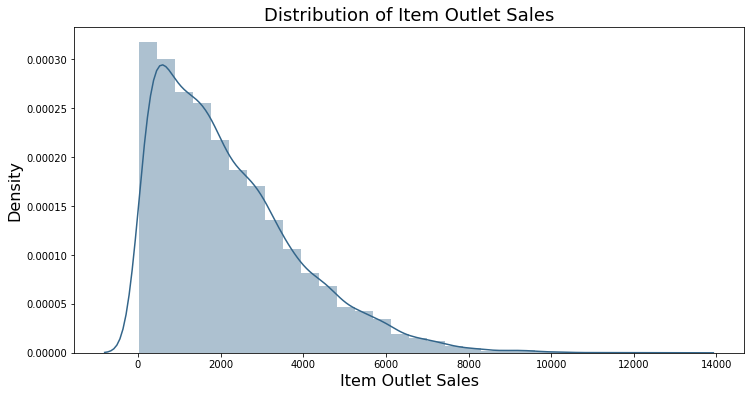

In [ ]:
plt.figure(figsize=(12,6))
sns.distplot(df1['Item_Outlet_Sales'], color='#33658a', bins=30, kde=True)
plt.xlabel('Item Outlet Sales',size=16)
plt.ylabel('Density',size=16)
plt.title('Distribution of Item Outlet Sales',size=18)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


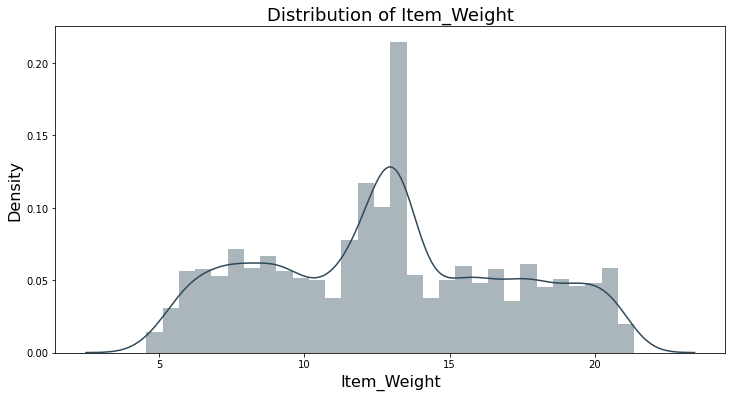

In [ ]:
plt.figure(figsize=(12,6))
sns.distplot(df1['Item_Weight'], color='#2f4858', bins=30, kde=True)
plt.xlabel('Item_Weight',size=16)
plt.ylabel('Density',size=16)
plt.title('Distribution of Item_Weight',size=18)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


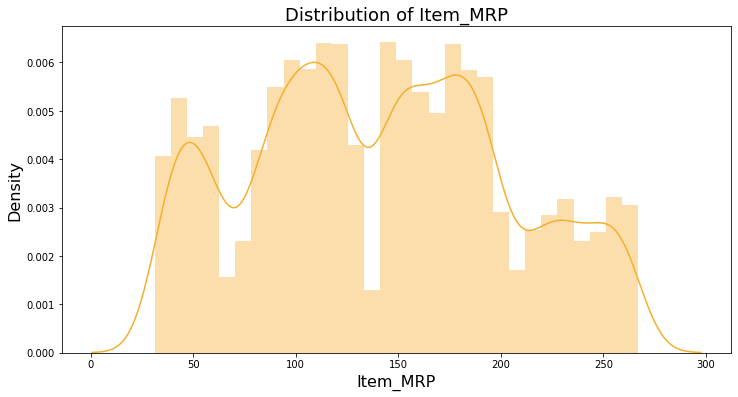

In [ ]:
plt.figure(figsize=(12,6))
sns.distplot(df1['Item_MRP'], color='#f6ae2d', bins=30, kde=True)
plt.xlabel('Item_MRP',size=16)
plt.ylabel('Density',size=16)
plt.title('Distribution of Item_MRP',size=18)
plt.show()

Lets see if there is any impact on sales on basis of Outlet Establisment Year

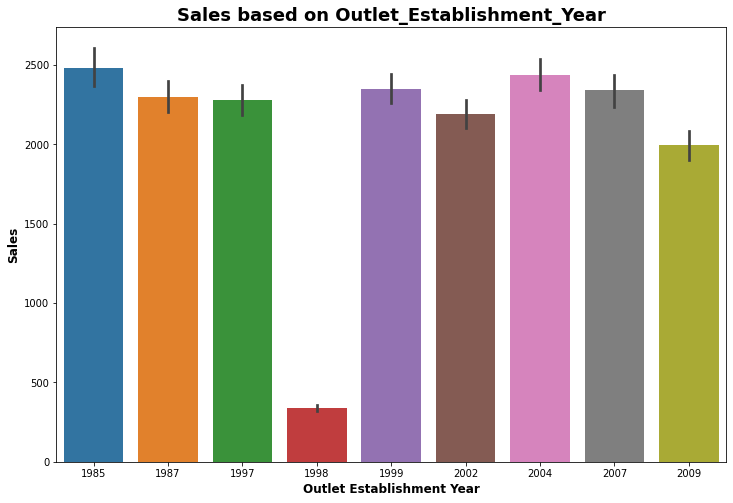

In [ ]:
plt.figure(figsize=(12,8))
plt.title('Sales based on Outlet_Establishment_Year',size=18,fontweight="bold")
sns.barplot(data=df1,x="Outlet_Establishment_Year",y="Item_Outlet_Sales")
plt.xlabel("Outlet Establishment Year",size=12,fontweight="bold")
plt.ylabel("Sales",size=12,fontweight="bold")
plt.show()

Seems like every year is having similar Sales except 1998, Lets find out why

In [ ]:
df1["Outlet_Establishment_Year"].value_counts()

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

Heres the reason why clearly the 1998 records are low. From this we can infer that theres is some difference in number of columns to aviod this lets take mean of the years

In [ ]:
est_sales = df1.groupby('Outlet_Establishment_Year')['Item_Outlet_Sales'].mean()
est_sales

Outlet_Establishment_Year
1985    2483.677474
1987    2298.995256
1997    2277.844267
1998     339.351662
1999    2348.354635
2002    2192.384798
2004    2438.841866
2007    2340.675263
2009    1995.498739
Name: Item_Outlet_Sales, dtype: float64

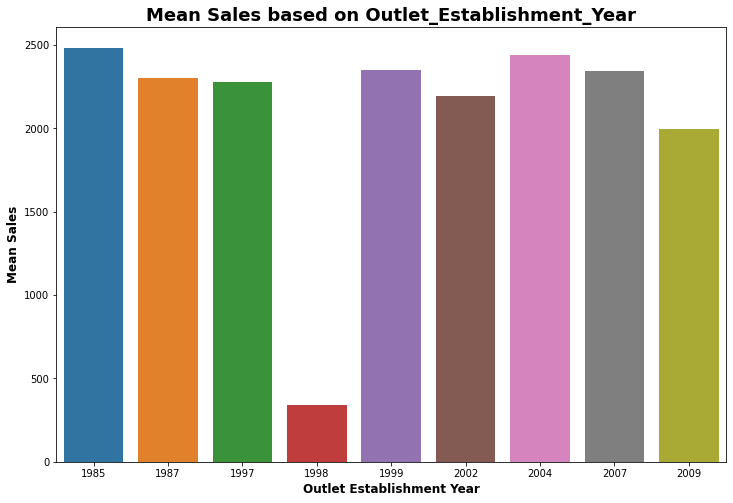

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,8))
plt.title('Mean Sales based on Outlet_Establishment_Year',size=18,fontweight="bold")
est_sales = df1.groupby('Outlet_Establishment_Year')['Item_Outlet_Sales'].mean()
sns.barplot(x=est_sales.index, y=est_sales.values)
plt.xlabel("Outlet Establishment Year",size=12,fontweight="bold")
plt.ylabel("Mean Sales",size=12,fontweight="bold")
plt.show()

Even we took mean into consideration the average is less. So, based on this the stroes which got established in 1998 are less in sales

## Dealing with Categorical Variables


In [ ]:
df1["Item_Fat_Content"].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [ ]:
df1.replace({'Item_Fat_Content': {'low fat':'Low Fat','LF':'Low Fat', 'reg':'Regular'}}, inplace=True)

In [ ]:
df1["Item_Fat_Content"].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

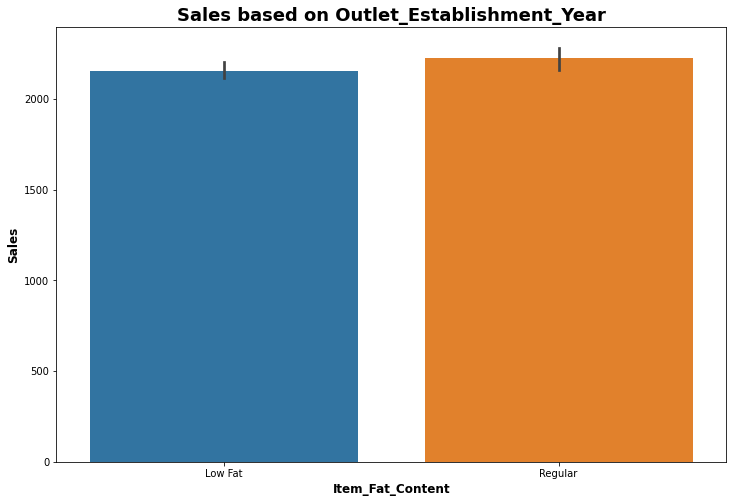

In [ ]:
plt.figure(figsize=(12,8))
plt.title('Sales based on Outlet_Establishment_Year',size=18,fontweight="bold")
sns.barplot(data=df1,x="Item_Fat_Content",y="Item_Outlet_Sales")
plt.xlabel("Item_Fat_Content",size=12,fontweight="bold")
plt.ylabel("Sales",size=12,fontweight="bold")
plt.show()

**Label Encoding**

Label encoding is an important technique in data preprocessing, especially for categorical data. It involves converting categorical values into numeric labels that can be easily processed by machine learning models.

In [ ]:
encoder = LabelEncoder()

In [ ]:
df1['Item_Identifier'] = encoder.fit_transform(df1['Item_Identifier'])

df1['Item_Fat_Content'] = encoder.fit_transform(df1['Item_Fat_Content'])

df1['Item_Type'] = encoder.fit_transform(df1['Item_Type'])

df1['Outlet_Identifier'] = encoder.fit_transform(df1['Outlet_Identifier'])

df1['Outlet_Size'] = encoder.fit_transform(df1['Outlet_Size'])

df1['Outlet_Location_Type'] = encoder.fit_transform(df1['Outlet_Location_Type'])

df1['Outlet_Type'] = encoder.fit_transform(df1['Outlet_Type'])

In [ ]:
df1.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


# Feature Engineering

# Modelling

Approach towards the problem is to do data clustering first and use data models accordingly

# Model Evaluation